# DBSCAN clustering

In [1]:
import math
import numpy as np
import pandas as pd
import scipy.stats as stats
import matplotlib.pyplot as plt
from sklearn.preprocessing import MinMaxScaler
from scipy.stats import zscore
from pandas.plotting import scatter_matrix
from sklearn.preprocessing import LabelEncoder
from mpl_toolkits.mplot3d import Axes3D

In [2]:
df=pd.read_csv('./datasets/datasetFINALE.csv')

Data Normalization

In [3]:
from sklearn.preprocessing import StandardScaler, MinMaxScaler

In [4]:
scaler = MinMaxScaler()
X = scaler.fit_transform(df[['tenure','MonthlyCharges','ServiceCount']].values)

In [5]:
ddf=df
df[['tenure','MonthlyCharges','ServiceCount']] = X
df.head()

,SeniorCitizen,Dependents,tenure,InternetService,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,Churn,ServiceCount,PhoneService
0,No,No,0.013889,DSL,Month-to-month,Yes,Electronic check,0.115423,No,0.166667,No phone service
1,No,No,0.472222,DSL,One year,No,Mailed check,0.385075,No,0.333333,Single line
2,No,No,0.027778,DSL,Month-to-month,Yes,Mailed check,0.354229,Yes,0.333333,Single line
3,No,No,0.625000,DSL,One year,No,Bank transfer (automatic),0.239303,No,0.500000,No phone service
4,No,No,0.027778,Fiber optic,Month-to-month,Yes,Electronic check,0.521891,Yes,0.000000,Single line


In [6]:
label_encoders = dict()
column2encode = ['SeniorCitizen','Dependents','InternetService','Contract',
                 'PaperlessBilling','PaymentMethod','PhoneService']

for col in column2encode:
    le = LabelEncoder()
    le.fit(df[col].unique())
    df[col] = le.transform(df[col])
    label_encoders[col] = le

In [7]:
target=df.Churn
df=df.drop('Churn',axis=1)
df.head()

,SeniorCitizen,Dependents,tenure,InternetService,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,ServiceCount,PhoneService
0,0,0,0.013889,0,0,1,2,0.115423,0.166667,1
1,0,0,0.472222,0,1,0,3,0.385075,0.333333,2
2,0,0,0.027778,0,0,1,3,0.354229,0.333333,2
3,0,0,0.625000,0,1,0,0,0.239303,0.500000,1
4,0,0,0.027778,1,0,1,2,0.521891,0.000000,2


In [8]:
numerici=df[['tenure','MonthlyCharges','ServiceCount']]
df=df.drop(['tenure','MonthlyCharges','ServiceCount'],axis=1)
df[['tenure','MonthlyCharges','ServiceCount']]=numerici
df.head()

,SeniorCitizen,Dependents,InternetService,Contract,PaperlessBilling,PaymentMethod,PhoneService,tenure,MonthlyCharges,ServiceCount
0,0,0,0,0,1,2,1,0.013889,0.115423,0.166667
1,0,0,0,1,0,3,2,0.472222,0.385075,0.333333
2,0,0,0,0,1,3,2,0.027778,0.354229,0.333333
3,0,0,0,1,0,0,1,0.625000,0.239303,0.500000
4,0,0,1,0,1,2,2,0.027778,0.521891,0.000000


DBSCAN

In [9]:
from sklearn.cluster import DBSCAN

Knee Method to estimate the best eps

In [12]:
from scipy.spatial.distance import pdist, squareform
from scipy.spatial import distance
from sklearn.metrics import jaccard_similarity_score

In [18]:
from scipy.spatial.distance import euclidean
from sklearn.metrics import jaccard_similarity_score as jaccard
from scipy.spatial.distance import hamming as hamming
from sklearn.metrics import silhouette_score

In [14]:
def my_dist(x,y):
    n_num=3
    n_cat=7
    return (n_num/(n_num+n_cat))*euclidean(x[n_cat:(n_num+n_cat)],y[n_cat:(n_num+n_cat)])+(n_cat/(n_num+n_cat))*hamming(x[:n_cat],y[:n_cat])

In [15]:
dist=pdist(df.values,my_dist)

In [16]:
dist_square = squareform(dist)

Denormalizzazione

In [21]:
df[['tenure','MonthlyCharges','ServiceCount']]=scaler.inverse_transform(df[['tenure','MonthlyCharges','ServiceCount']].values)

In [22]:
df.head()

,SeniorCitizen,Dependents,InternetService,Contract,PaperlessBilling,PaymentMethod,PhoneService,tenure,MonthlyCharges,ServiceCount
0,0,0,0,0,1,2,1,1.0,29.85,1.0
1,0,0,0,1,0,3,2,34.0,56.95,2.0
2,0,0,0,0,1,3,2,2.0,53.85,2.0
3,0,0,0,1,0,0,1,45.0,42.30,3.0
4,0,0,1,0,1,2,2,2.0,70.70,0.0


In [124]:
k = 11
k11th_distances = list()
for d in dist_square:
    index_kth_distance = np.argsort(d)[k]
    k11th_distances.append(d[index_kth_distance])

In [118]:
k = 13
k13th_distances = list()
for d in dist_square:
    index_kth_distance = np.argsort(d)[k]
    k13th_distances.append(d[index_kth_distance])

In [119]:
k = 15
k15th_distances = list()
for d in dist_square:
    index_kth_distance = np.argsort(d)[k]
    k15th_distances.append(d[index_kth_distance])

In [120]:
k = 18
k18th_distances = list()
for d in dist_square:
    index_kth_distance = np.argsort(d)[k]
    k18th_distances.append(d[index_kth_distance])

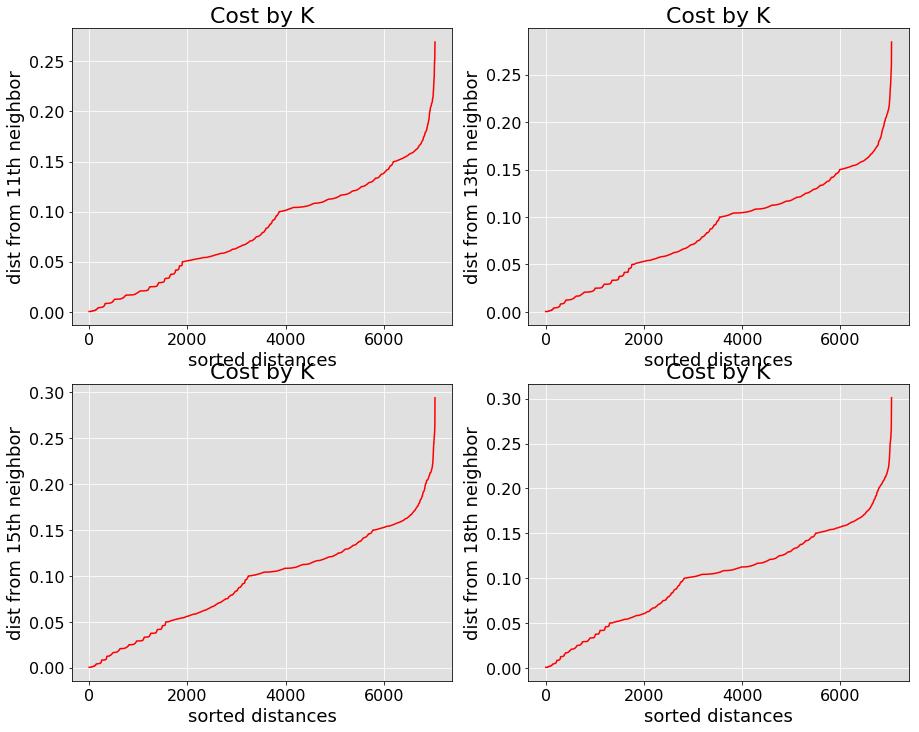

In [259]:
f = plt.figure(figsize=(15,12))
ax = f.add_subplot(2,2,1)

ax.plot(range(0, len(k11th_distances)), sorted(k11th_distances),color='red')
plt.ylabel('dist from %sth neighbor' % k, fontsize=18)
plt.xlabel('sorted distances', fontsize=18)
plt.tick_params(axis='both', which='major', labelsize=16)

plt.grid(color='w')
ax.set_axisbelow(True)
ax.set_facecolor('#E0E0E0')
plt.title('Cost by K', fontsize=22)


ax2 = f.add_subplot(2,2,2)

ax2.plot(range(0, len(k13th_distances)), sorted(k13th_distances),color='red')
plt.ylabel('dist from %sth neighbor' % 13, fontsize=18)
plt.xlabel('sorted distances', fontsize=18)
plt.tick_params(axis='both', which='major', labelsize=16)

plt.grid(color='w')
ax2.set_axisbelow(True)
ax2.set_facecolor('#E0E0E0')
plt.title('Cost by K', fontsize=22)

ax3 = f.add_subplot(2,2,3)

ax3.plot(range(0, len(k15th_distances)), sorted(k15th_distances),color='red')
plt.ylabel('dist from %sth neighbor' % 15, fontsize=18)
plt.xlabel('sorted distances', fontsize=18)
plt.tick_params(axis='both', which='major', labelsize=16)

plt.grid(color='w')
ax3.set_axisbelow(True)
ax3.set_facecolor('#E0E0E0')
plt.title('Cost by K', fontsize=22)

ax4 = f.add_subplot(2,2,4)

ax4.plot(range(0, len(k18th_distances)), sorted(k18th_distances),color='red')
plt.ylabel('dist from %sth neighbor' % 18, fontsize=18)
plt.xlabel('sorted distances', fontsize=18)
plt.tick_params(axis='both', which='major', labelsize=16)

plt.grid(color='w')
ax4.set_axisbelow(True)
ax4.set_facecolor('#E0E0E0')
plt.title('Cost by K', fontsize=22)

plt.savefig('dbscan.png')

plt.show()

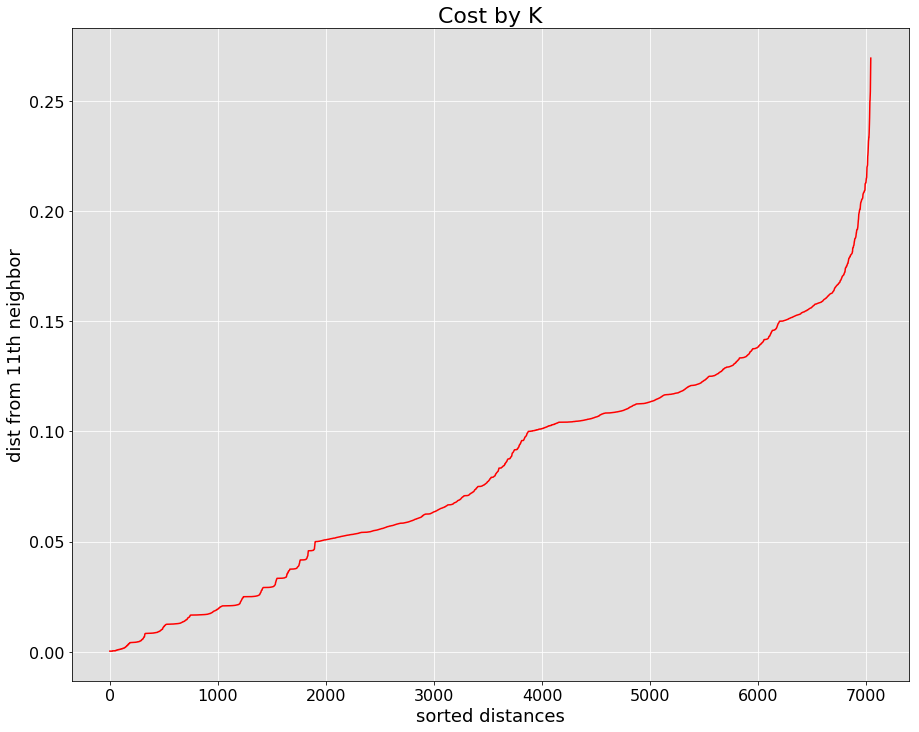

In [42]:
f = plt.figure(figsize=(15,12))
ax = f.add_subplot(1,1,1)

ax.plot(range(0, len(kth_distances)), sorted(kth_distances),color='red')
plt.ylabel('dist from %sth neighbor' % k, fontsize=18)
plt.xlabel('sorted distances', fontsize=18)
plt.tick_params(axis='both', which='major', labelsize=16)

plt.grid(color='w')
ax.set_axisbelow(True)
ax.set_facecolor('#E0E0E0')
plt.title('Cost by K', fontsize=22)

plt.show()

In [43]:
k = 13
kth_distances = list()
for d in dist_square:
    index_kth_distance = np.argsort(d)[k]
    kth_distances.append(d[index_kth_distance])

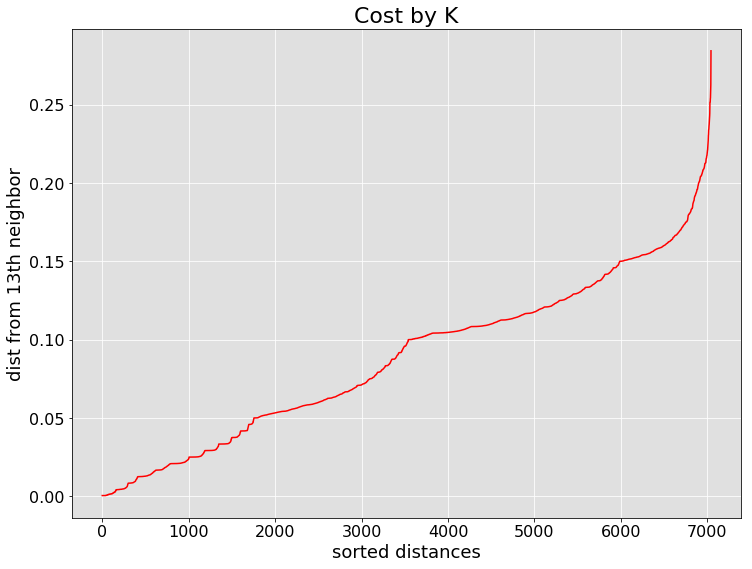

In [44]:
f = plt.figure(figsize=(12,9))
ax = f.add_subplot(1,1,1)

ax.plot(range(0, len(kth_distances)), sorted(kth_distances),color='red')
plt.ylabel('dist from %sth neighbor' % k, fontsize=18)
plt.xlabel('sorted distances', fontsize=18)
plt.tick_params(axis='both', which='major', labelsize=16)

plt.grid(color='w')
ax.set_axisbelow(True)
ax.set_facecolor('#E0E0E0')
plt.title('Cost by K', fontsize=22)

plt.show()

In [110]:
k = 15
kth_distances = list()
for d in dist_square:
    index_kth_distance = np.argsort(d)[k]
    kth_distances.append(d[index_kth_distance])

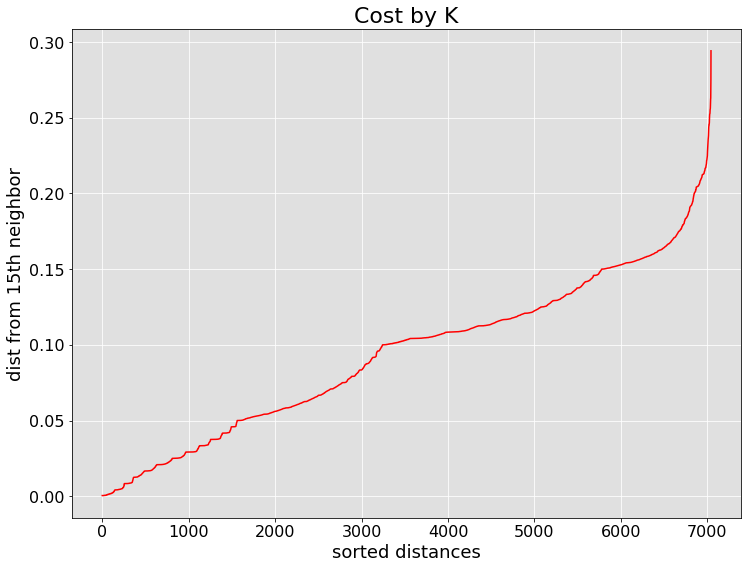

In [111]:
f = plt.figure(figsize=(12,9))
ax = f.add_subplot(1,1,1)

ax.plot(range(0, len(kth_distances)), sorted(kth_distances),color='red')
plt.ylabel('dist from %sth neighbor' % k, fontsize=18)
plt.xlabel('sorted distances', fontsize=18)
plt.tick_params(axis='both', which='major', labelsize=16)

plt.grid(color='w')
ax.set_axisbelow(True)
ax.set_facecolor('#E0E0E0')
plt.title('Cost by K', fontsize=22)

plt.show()

In [ ]:
dbscan_silhouette = []
min_k=11
max_k=30


for k in range(min_k, max_k+1):
    dbscan = DBSCAN(eps=0.13, min_samples=k)
    dbscan.fit(dist_square)
    score = silhouette_score(df.values, dbscan.labels_)
    print(k, " ", score)
    dbscan_silhouette.append(score)

11   -0.19763439578307693
12   -0.18671663561234003
13   -0.18671663561234003
14   -0.17213344588942986
15   -0.17213344588942986
16   -0.16059540211472756
17   -0.16059540211472756
18   -0.16059540211472756
19   -0.16059540211472756
20   -0.16059540211472756
21   -0.16059540211472756
22   -0.16247402950714213


In [ ]:
plt.plot(range(min_k, len(dbscan_silhouette) + 2), dbscan_silhouette)
plt.ylabel('Silhouette')
plt.xlabel('K')
plt.xticks(np.arange(min_k, max_k+1, 2))
plt.tick_params(axis='both', which='major')
plt.show()

In [263]:
from sklearn.cluster import DBSCAN
from sklearn.metrics import silhouette_score

In [260]:
dbscan = DBSCAN(eps=0.13, min_samples=13,metric="precomputed")
dbscan.fit(dist_square)

DBSCAN(algorithm='auto', eps=0.13, leaf_size=30, metric='precomputed',
    metric_params=None, min_samples=13, n_jobs=1, p=None)

In [264]:
score = silhouette_score(X, dbscan.labels_)
score

0.11987550609616307

Observing the size of each cluster

In [261]:
np.unique(dbscan.labels_, return_counts=True)

(array([-1,  0,  1,  2], dtype=int64),
 array([ 353, 2177, 2992, 1521], dtype=int64))

In [221]:
df['label']=dbscan.labels_

In [222]:
pd.crosstab(dati['Churn'],df['label'])

label,-1,0,1,2
Churn,,,,
No,313,1742,1711,1408
Yes,40,435,1281,113


------------------

Visualization of the clustering in two dimensions.

In [172]:
#pd.set_option('display.max_columns', 40)

In [32]:
dati=pd.read_csv('../datasets/datasetFINALE.csv')

In [147]:
# # df['label'] = df['label'].map(
#     {-1:-1,1:1,2:2,3:3,4:4,5:5,6:6,7:7,8:8,9:9,10:10,11:11,12:12,13:13,14:14,15:15,16:16,17:-1,18:-1,19:-1,20:-1})

In [149]:
daf=pd.read_csv('../datasets/step3_output.csv')

In [235]:
dati = pd.read_csv("../datasets/step1_output.csv")
dati.TotalCharges = dati.TotalCharges.replace(' ',np.nan)
dati.TotalCharges=dati.TotalCharges.astype(float)

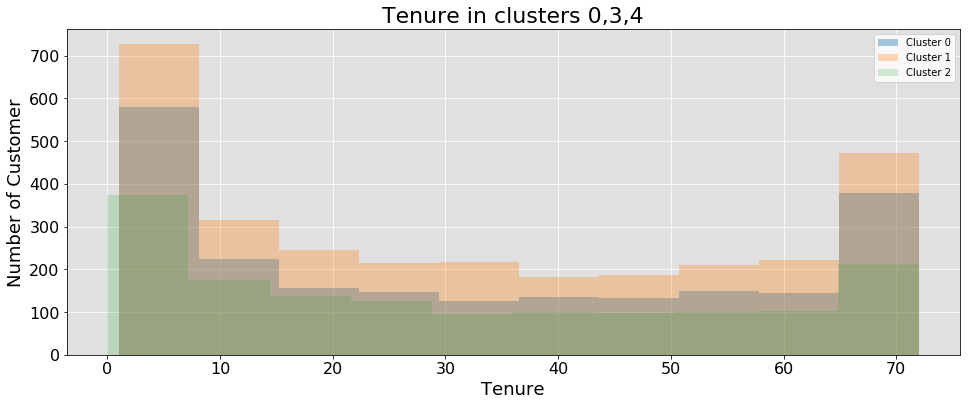

In [223]:
f = plt.figure(figsize=(16,6))
ax = f.add_subplot(1,1,1)

ax.hist(dati[df['label']==0]['tenure'], alpha=0.4, label='Cluster 0')
ax.hist(dati[df['label']==1]['tenure'], alpha=0.3, label='Cluster 1')
ax.hist(dati[df['label']==2]['tenure'], alpha=0.2, label='Cluster 2')

plt.tick_params(axis='both', which='major', labelsize=16)

plt.legend(fontsize=10, ncol=1, loc='upper right')
plt.grid(color='w')
ax.set_axisbelow(True)
ax.set_facecolor('#E0E0E0')

plt.title('Tenure in clusters 0,3,4', fontsize=22)
plt.ylabel('Number of Customer',fontsize=18)
plt.xlabel('Tenure',fontsize=18)

plt.savefig('TENUREDISTRIBUTIONINCL03.png')
plt.show()

c:\users\marco\appdata\local\programs\python\python37\lib\site-packages\ipykernel_launcher.py:11: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  # This is added back by InteractiveShellApp.init_path()
c:\users\marco\appdata\local\programs\python\python37\lib\site-packages\ipykernel_launcher.py:13: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  del sys.path[0]
c:\users\marco\appdata\local\programs\python\python37\lib\site-packages\ipykernel_launcher.py:15: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  from ipykernel import kernelapp as app
c:\users\marco\appdata\local\programs\python\python37\lib\site-packages\ipykernel_launcher.py:21: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
c:\users\marco\appdata\local\programs\python\python37\lib\site-packages\ipykernel_launcher.py:23: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
c:\users\marc

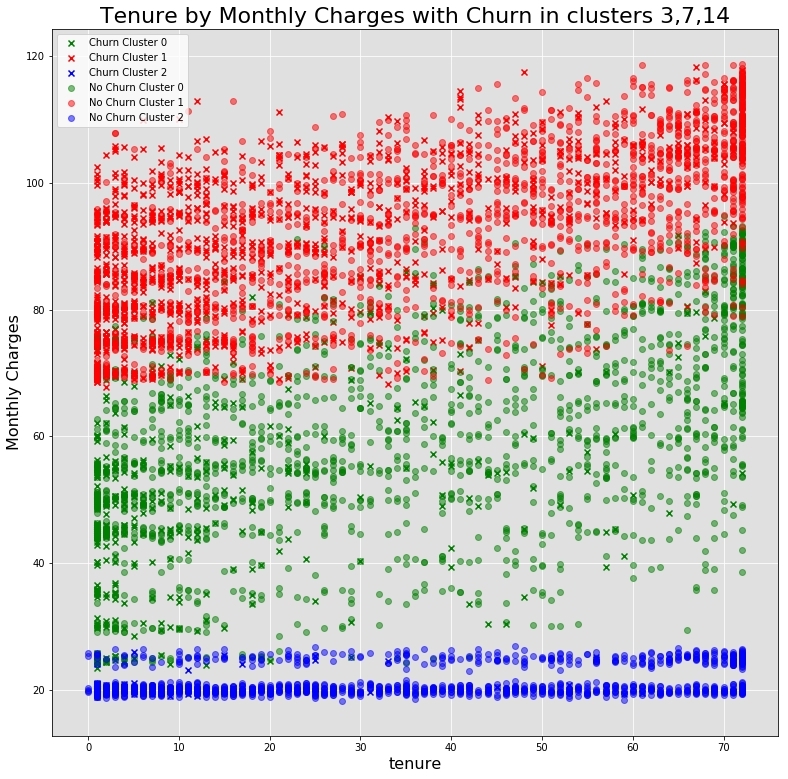

In [226]:
churn=dati[dati.Churn=='Yes']
Nochurn=dati[dati.Churn=='No']


f = plt.figure(figsize=(13,13))
ax = f.add_subplot(1,1,1)


# ax.scatter(churn[df.label==2]['tenure'].values,churn[df.label==2].MonthlyCharges,
#            marker='x',label='Churn Cluster 2')
ax.scatter(churn[df.label==0]['tenure'].values,churn[df.label==0].MonthlyCharges,
           c='green',marker='x',label='Churn Cluster 0')
ax.scatter(churn[df.label==1]['tenure'].values,churn[df.label==1].MonthlyCharges,
           c='red',marker='x',label='Churn Cluster 1')
ax.scatter(churn[df.label==2]['tenure'].values,churn[df.label==2].MonthlyCharges,
           c='blue',marker='x',label='Churn Cluster 2')


# ax.scatter(Nochurn[df.label==2]['tenure'].values,Nochurn[df.label==2].MonthlyCharges,
#            alpha=0.5,label='No Churn Cluster 2')
ax.scatter(Nochurn[df.label==0]['tenure'].values,Nochurn[df.label==0].MonthlyCharges,
           c='green',alpha=0.5,label='No Churn Cluster 0')
ax.scatter(Nochurn[df.label==1]['tenure'].values,Nochurn[df.label==1].MonthlyCharges,
           c='red',alpha=0.5,label='No Churn Cluster 1')
ax.scatter(Nochurn[df.label==2]['tenure'].values,Nochurn[df.label==2].MonthlyCharges,
           c='blue',alpha=0.5,label='No Churn Cluster 2')


plt.ylabel('Monthly Charges',fontsize=16)
plt.xlabel('tenure',fontsize=16)
plt.title('Tenure by Monthly Charges with Churn in clusters 3,7,14',fontsize=22)
plt.grid(color='w')
plt.legend(fontsize=10, ncol=1, loc='upper left')
ax.set_facecolor('#E0E0E0')
ax.set_axisbelow(True)

plt.savefig('TenurebyMonthlyChargeswithChurninclusters034.png')

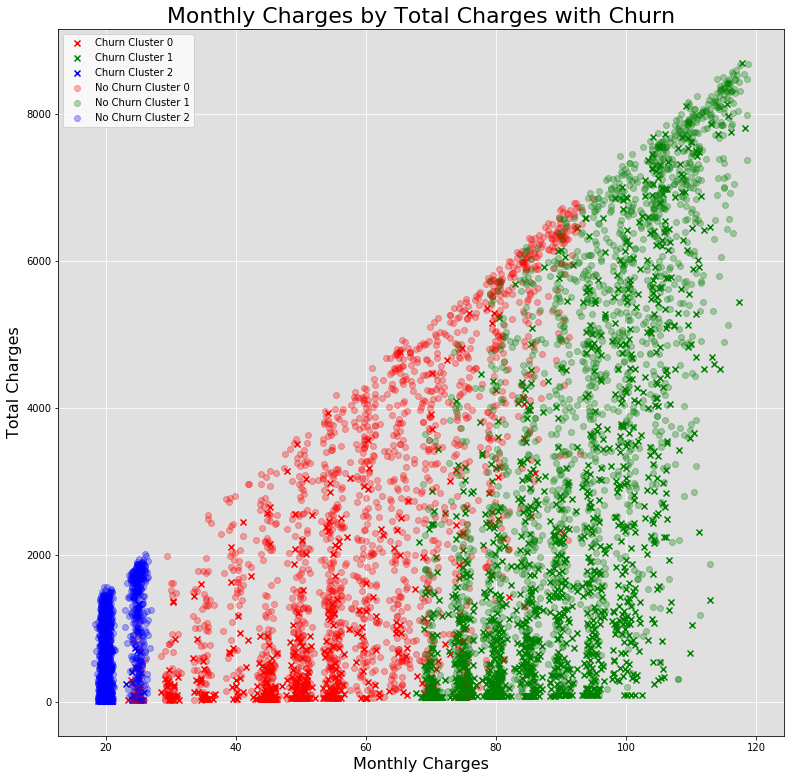

In [237]:
f = plt.figure(figsize=(13,13))
ax = f.add_subplot(1,1,1)

churn=dati[dati.Churn=='Yes']
Nochurn=dati[dati.Churn=='No']
df['Churn']=target

ax.scatter(churn[df[df.Churn=='Yes'].label==0]['MonthlyCharges'].values,churn[df[df.Churn=='Yes'].label==0].TotalCharges,
           c='r',marker='x',label='Churn Cluster 0')
ax.scatter(churn[df[df.Churn=='Yes'].label==1]['MonthlyCharges'].values,churn[df[df.Churn=='Yes'].label==1].TotalCharges,
           c='green',marker='x',label='Churn Cluster 1')
ax.scatter(churn[df[df.Churn=='Yes'].label==2]['MonthlyCharges'].values,churn[df[df.Churn=='Yes'].label==2].TotalCharges,
           c='blue',marker='x',label='Churn Cluster 2')

ax.scatter(Nochurn[df[df.Churn=='No'].label==0]['MonthlyCharges'].values,Nochurn[df[df.Churn=='No'].label==0].TotalCharges,
           c='r',alpha=0.3,label='No Churn Cluster 0')
ax.scatter(Nochurn[df[df.Churn=='No'].label==1]['MonthlyCharges'].values,Nochurn[df[df.Churn=='No'].label==1].TotalCharges,
           c='green',alpha=0.3,label='No Churn Cluster 1')
ax.scatter(Nochurn[df[df.Churn=='No'].label==2]['MonthlyCharges'].values,Nochurn[df[df.Churn=='No'].label==2].TotalCharges,
           c='blue',alpha=0.3,label='No Churn Cluster 2')




plt.ylabel('Total Charges',fontsize=16)
plt.xlabel('Monthly Charges',fontsize=16)
plt.title('Monthly Charges by Total Charges with Churn',fontsize=22)
plt.grid(color='w')

ax.set_facecolor('#E0E0E0')
ax.set_axisbelow(True)
plt.legend(fontsize=10, ncol=1, loc='upper left')

plt.savefig('MONTHLYCHARGESBYTOTALCHARGESINCL034.png')

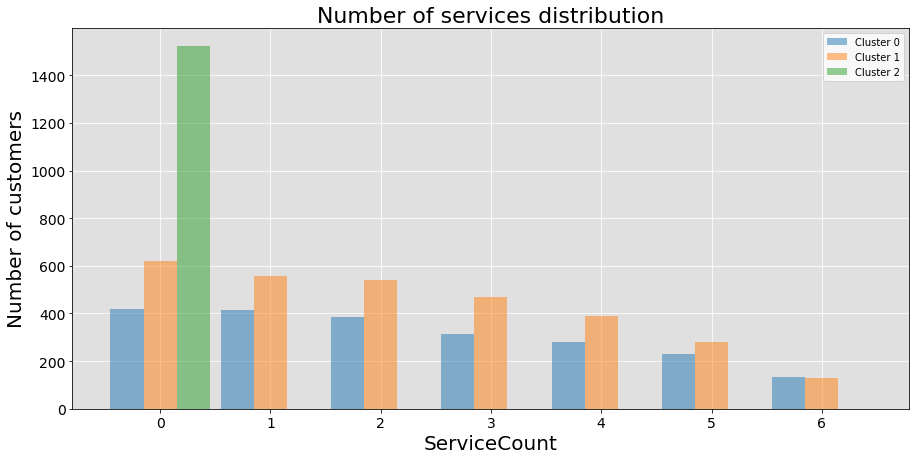

In [247]:
dataset =df
f = plt.figure(figsize=(15,7))
ax = f.add_subplot(1,1,1)

ax.bar(np.arange(7)-0.3,dati[dataset['label']==0]['ServiceCount'].value_counts(dropna=False).values,width=0.3,
       alpha=0.5, label='Cluster 0')
ax.bar(np.arange(7),dati[dataset['label']==1]['ServiceCount'].value_counts(dropna=False).values,width=0.3,
       alpha=0.5, label='Cluster 1')
ax.bar(np.arange(7)+0.3,np.array([1521,0,0,0,0,0,0]),width=0.3,
       alpha=0.5, label='Cluster 2')

plt.ylabel('Number of customers',fontsize=20)
plt.xlabel('ServiceCount',fontsize=20)
plt.yticks(fontsize=14)
plt.xticks(fontsize=14)
plt.grid(color='w')
ax.set_axisbelow(True)
ax.set_facecolor('#E0E0E0')
plt.title('Number of services distribution', fontsize=22)
plt.legend(loc='upper right')

plt.savefig('ServiceCountDistcl03.png')

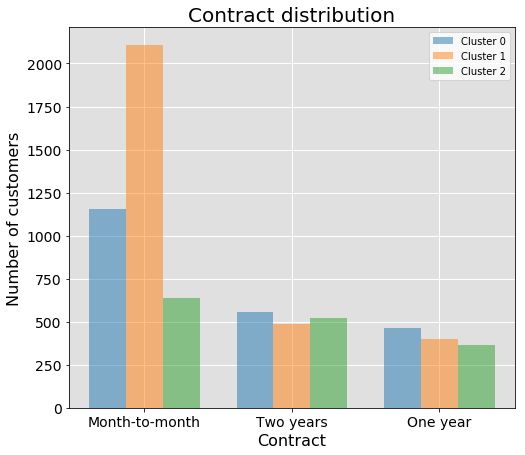

In [257]:
f = plt.figure(figsize=(8,7))
ax = f.add_subplot(1,1,1)

index=np.arange(3)
width=0.25

plt.bar(index-width,df[df['label']==0]['Contract'].value_counts(dropna=False).values,width=0.25,
       alpha=0.5, label='Cluster 0')
plt.bar(index,df[df['label']==1]['Contract'].value_counts(dropna=False).values,width=0.25,
       alpha=0.5, label='Cluster 1')
plt.bar(index+width,df[df['label']==2]['Contract'].value_counts(dropna=False).values,width=0.25,
       alpha=0.5, label='Cluster 2')



plt.ylabel('Number of customers',fontsize=16)
plt.xlabel('Contract',fontsize=16)
plt.yticks(fontsize=14)
plt.xticks(index,['Month-to-month','Two years','One year'],fontsize=14)
plt.grid(color='w', linewidth=1)
ax.set_facecolor('#E0E0E0')
ax.set_axisbelow(True)
plt.legend(loc='upper right')

plt.title('Contract distribution',fontsize=20)
plt.savefig('ContractDistribution.png')